# Boom Bike Sharing Assignment
Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially, the company wants model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [377]:
#importing all the necessary libraries

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [378]:
# ignore warnings
warnings.filterwarnings('ignore')

In [379]:
# read daa
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [380]:
# shape of df
print("shape", df.shape)

# describe the data
df.describe()

shape (730, 16)


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [381]:
# datatype of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Visualising the Data

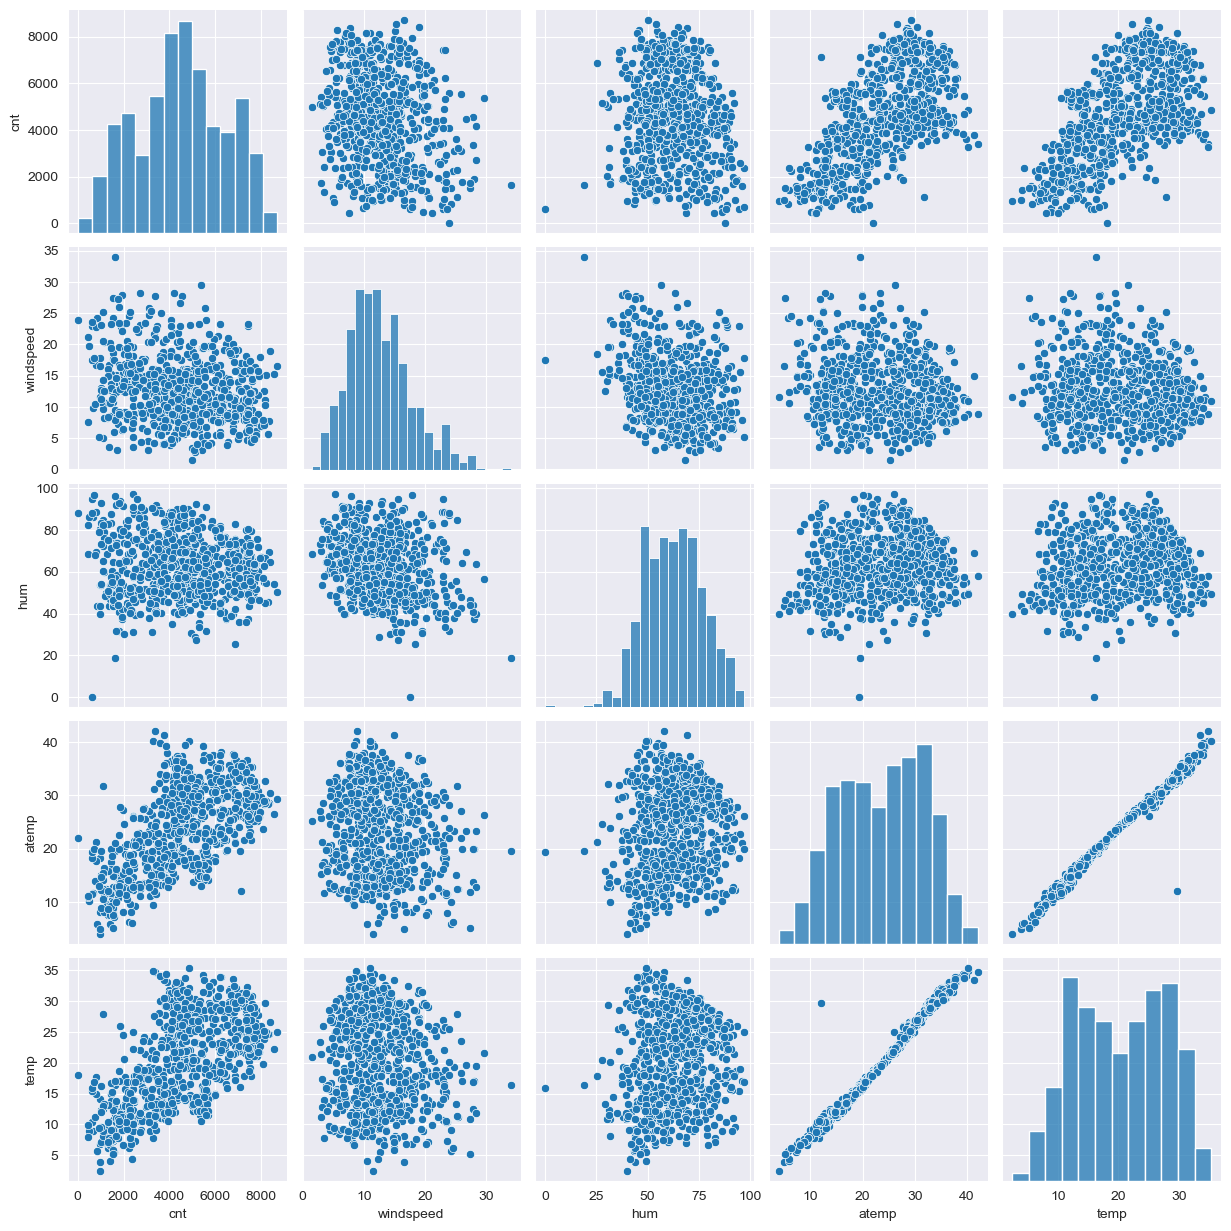

In [382]:
sns.pairplot(df[['cnt','windspeed', 'hum', 'atemp', 'temp']])
plt.show()

###### There is linear relationship between temp to cnt and atemp to count feature.  temp and atemp are having high corr value, out of these 2 feature one can be drop. 

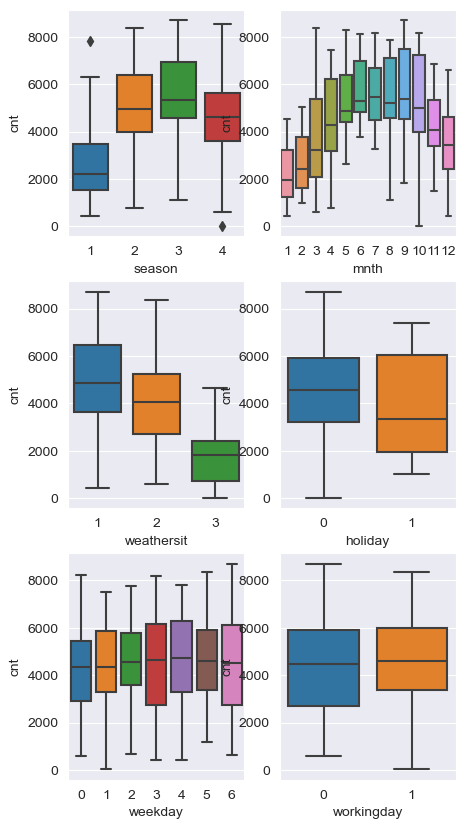

In [383]:
#### Visualising Categorical Variables

plt.figure(figsize=(5, 10))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

###### Good amount of booking happened in season 2 and season 3 with meadian over 5000. this can be good preditor
######  Most of bike booked on non holidays, can be good predictor
##### workingday can also be good predictor since most of booking happening in working days.

##  Data Quality checks and Data Preparation

In [384]:
# check do we have any null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [385]:
# drop duplicates rows
df.drop_duplicates(subset=None, inplace=True)

In [386]:
# instants column contains just sequence number 
# dteday column contains date, same data can be dereived from columns year, month and weekday
# our target variable is cnt and which consist of casual + registered , we dont have any requirement for type of customer
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [387]:
#convert columns to meaningFul category types
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df['mnth'].replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace=True)


In [388]:
# mark above columns as category type
df['season'] = df['season'].astype('category');
df['weathersit'] = df['weathersit'].astype('category');
df['weekday'] = df['weekday'].astype('category');
df['mnth'] = df['mnth'].astype('category');
df.info 

<bound method DataFrame.info of      season  yr mnth  holiday    weekday  workingday        weathersit  \
0    spring   0  jan        0   Saturday           0       Mist_cloudy   
1    spring   0  jan        0     Sunday           0       Mist_cloudy   
2    spring   0  jan        0     Monday           1  Clear_Few Clouds   
3    spring   0  jan        0    Tuesday           1  Clear_Few Clouds   
4    spring   0  jan        0  Wednesday           1  Clear_Few Clouds   
..      ...  ..  ...      ...        ...         ...               ...   
725  spring   1  dec        0   Thursday           1       Mist_cloudy   
726  spring   1  dec        0     Friday           1       Mist_cloudy   
727  spring   1  dec        0   Saturday           0       Mist_cloudy   
728  spring   1  dec        0     Sunday           0  Clear_Few Clouds   
729  spring   1  dec        0     Monday           1       Mist_cloudy   

          temp     atemp      hum  windspeed   cnt  
0    14.110847  18.18125  

In [389]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [390]:
# create dummy variables 
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   yr                                             730 non-null    int64  
 1   holiday                                        730 non-null    int64  
 2   workingday                                     730 non-null    int64  
 3   temp                                           730 non-null    float64
 4   atemp                                          730 non-null    float64
 5   hum                                            730 non-null    float64
 6   windspeed                                      730 non-null    float64
 7   cnt                                            730 non-null    int64  
 8   season_spring                                  730 non-null    uint8  
 9   season_summer                                  730 non

In [391]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

## Splitting the Data into Training and Testing Sets


In [392]:
df_train, df_test = train_test_split(df, train_size = 0.70, test_size = 0.30, random_state = 100)

In [393]:
# Rescaling the features
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


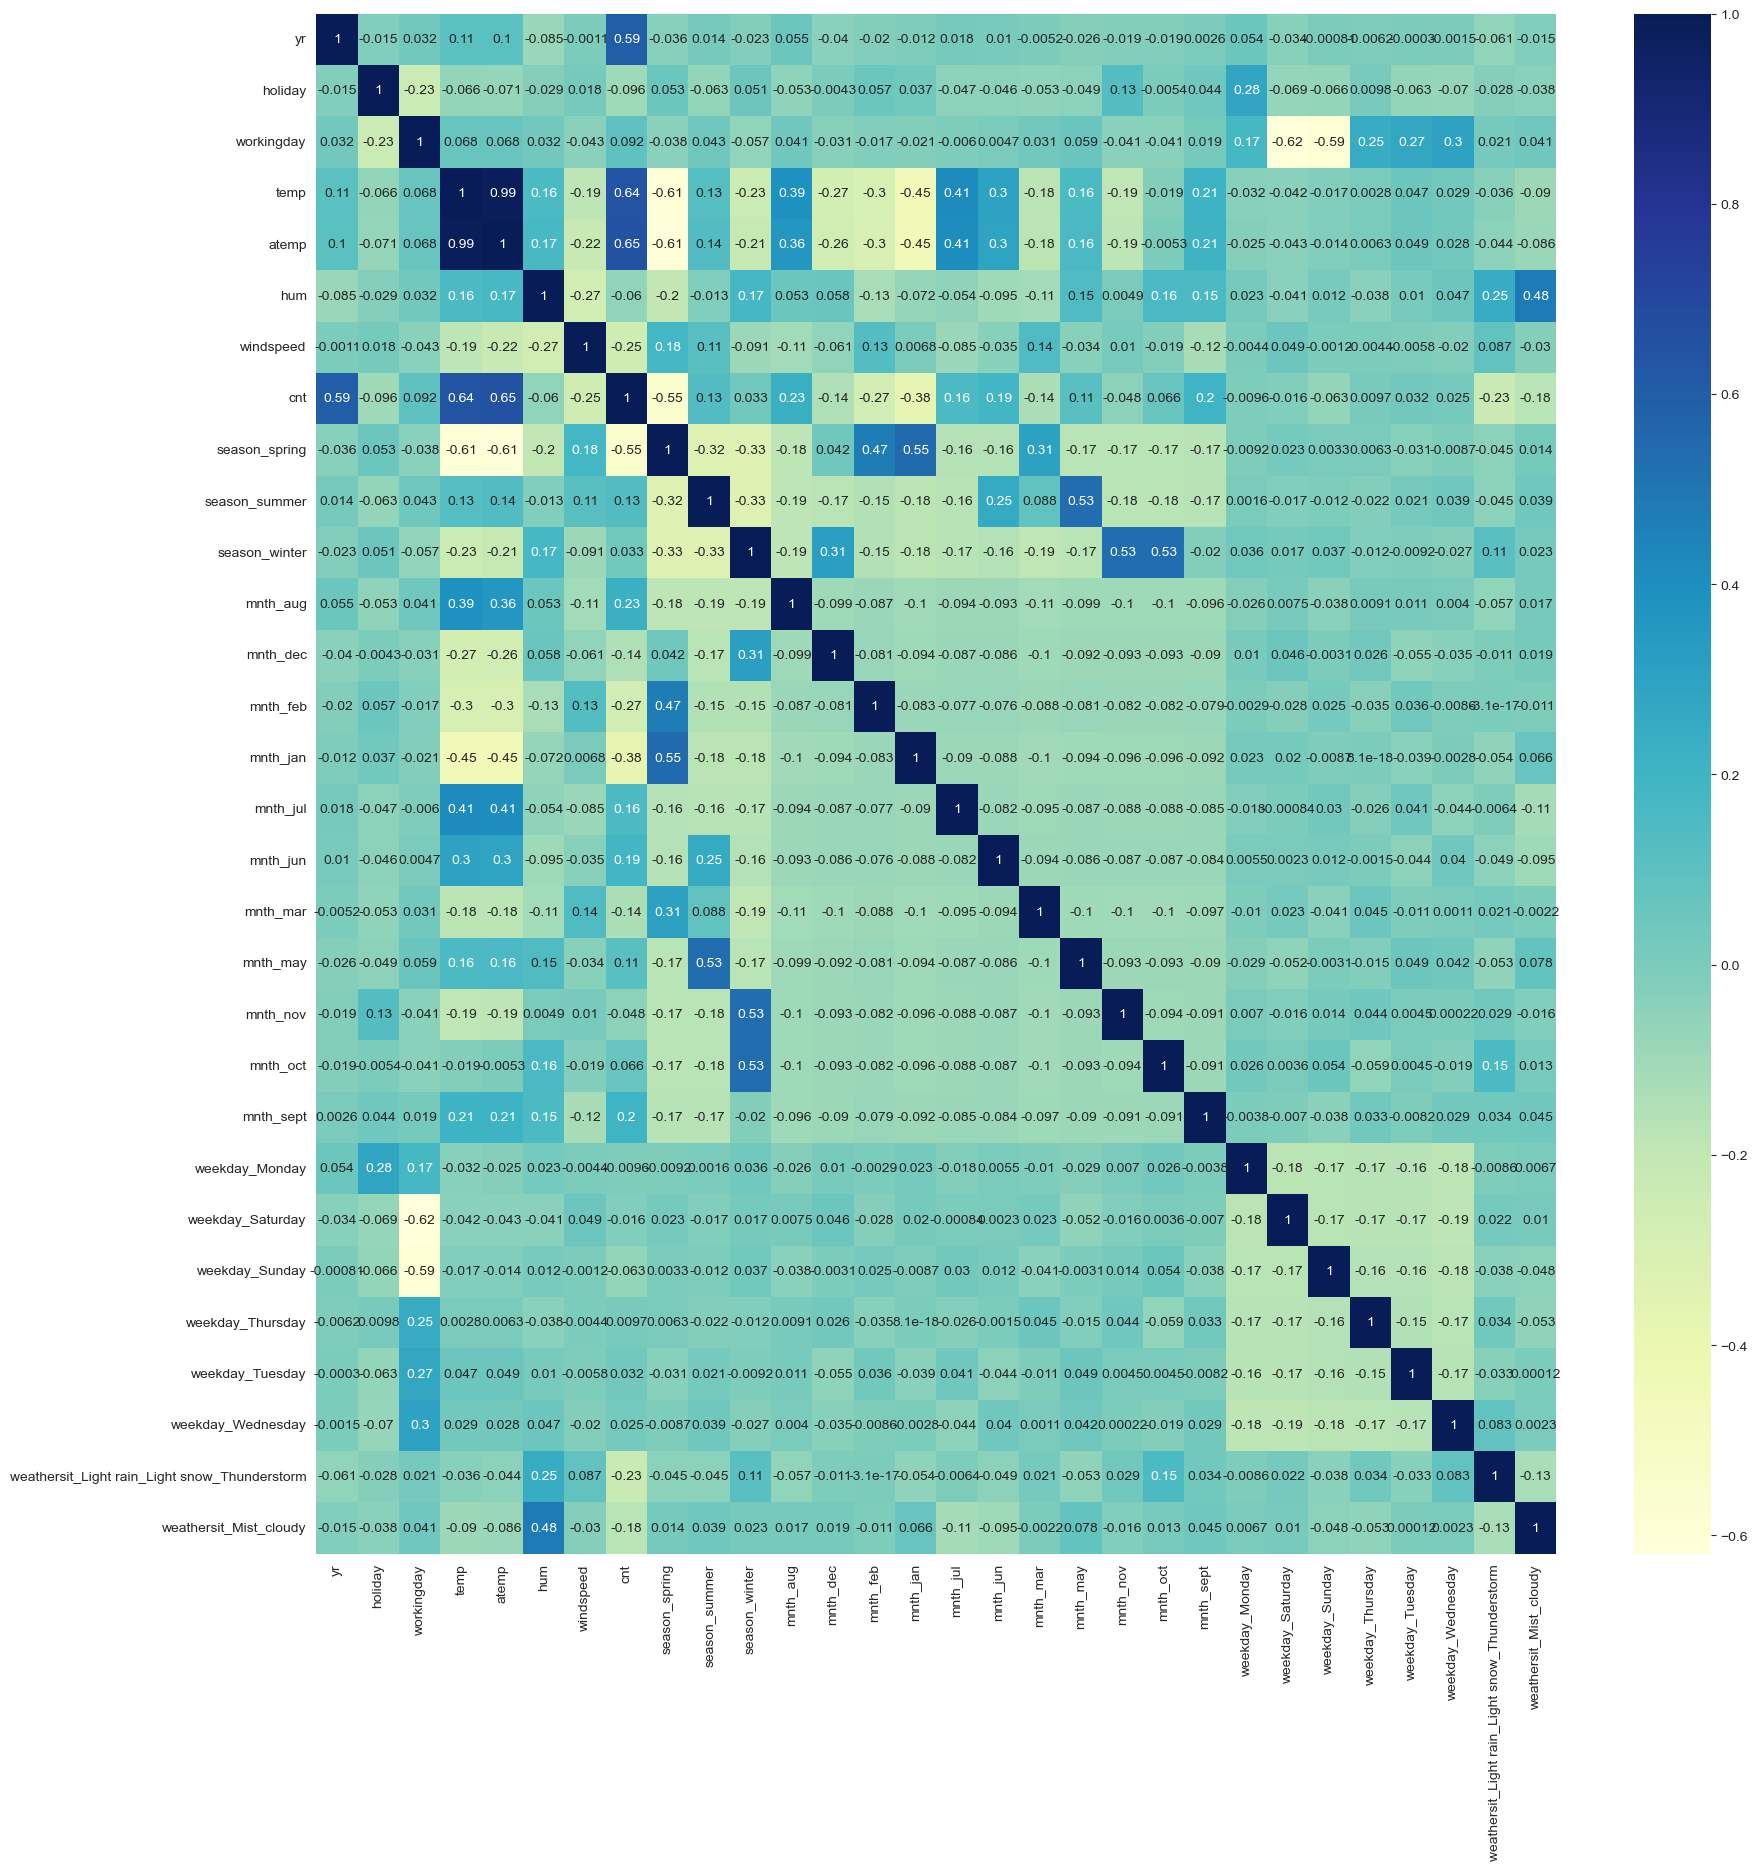

In [394]:
plt.figure(figsize = (20,20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### target cnt feature having good corr score with yr , temp and atemp feature. temp and atemp having very high corr score with each other, can be replace by each other

In [395]:
# deviding into X and Y stes for model building
y_train = df_train.pop('cnt')
X_train = df_train

## Building a linear model

In [396]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15) # running RFE
rfe = rfe.fit(X_train, y_train)

In [397]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 13),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 5),
 ('mnth_mar', False, 9),
 ('mnth_may', False, 15),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('weekday_Monday', False, 14),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thursday', False, 12),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 10),
 ('weathersit_Light rain_Light snow_Thunderstorm', True, 1),
 ('weathersit_Mist_cloudy', True, 1)]

In [399]:
# remove all the columns which rfe result not support
col = X_train.columns[rfe.support_]
X_train_lm = X_train[col]
X_train_lm.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_jan,mnth_jul,mnth_sept,weekday_Saturday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1


In [400]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_lm)

# Create a first fitted model
lm = sm.OLS(y_train, X_train_rfe).fit()

# Check the parameters obtained
print(lm.params)

# Print a summary of the linear regression model obtained
print(lm.summary())


const                                            0.251042
yr                                               0.230502
holiday                                         -0.058529
workingday                                       0.043521
temp                                             0.509836
hum                                             -0.154716
windspeed                                       -0.185956
season_spring                                   -0.050806
season_summer                                    0.049660
season_winter                                    0.094426
mnth_jan                                        -0.034326
mnth_jul                                        -0.053193
mnth_sept                                        0.081186
weekday_Saturday                                 0.053721
weathersit_Light rain_Light snow_Thunderstorm   -0.248777
weathersit_Mist_cloudy                          -0.057824
dtype: float64
                            OLS Regression Results       

In [401]:
# All the p scores are less then 0.05 and we have good R^2 values. now lets check VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
14,weathersit_Mist_cloudy,2.29
0,yr,2.09
12,weekday_Saturday,1.98


In [402]:
# VIF values of hum is far more then 10 , removing this column

X_train_lm.drop(['hum'], axis=1 , inplace = True)

X_train_rfe = sm.add_constant(X_train_lm)

# Create a fitted model
lm = sm.OLS(y_train, X_train_rfe).fit()

# Check the parameters obtained
print(lm.params)

# Print a summary of the linear regression model obtained
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

const                                            0.173663
yr                                               0.234361
holiday                                         -0.056199
workingday                                       0.046502
temp                                             0.472823
windspeed                                       -0.156264
season_spring                                   -0.059704
season_summer                                    0.043352
season_winter                                    0.079699
mnth_jan                                        -0.038947
mnth_jul                                        -0.048222
mnth_sept                                        0.075318
weekday_Saturday                                 0.058434
weathersit_Light rain_Light snow_Thunderstorm   -0.291727
weathersit_Mist_cloudy                          -0.082621
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cn

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,season_spring,3.08
6,season_summer,2.33
0,yr,2.08
7,season_winter,1.99
11,weekday_Saturday,1.97
8,mnth_jan,1.62
9,mnth_jul,1.59


In [403]:
## in visualization we see temp and target value have linear relation , so not removing. removing working days feature

X_train_lm.drop(['workingday'], axis=1 , inplace = True)

X_train_rfe = sm.add_constant(X_train_lm)

# Create a first fitted model
lm = sm.OLS(y_train, X_train_rfe).fit()

# Check the parameters obtained
print(lm.params)

# Print a summary of the linear regression model obtained
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

const                                            0.212097
yr                                               0.234633
holiday                                         -0.093921
temp                                             0.474065
windspeed                                       -0.157048
season_spring                                   -0.061299
season_summer                                    0.042485
season_winter                                    0.076900
mnth_jan                                        -0.038289
mnth_jul                                        -0.051174
mnth_sept                                        0.076032
weekday_Saturday                                 0.020135
weathersit_Light rain_Light snow_Thunderstorm   -0.286860
weathersit_Mist_cloudy                          -0.080792
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:         

,Features,VIF
2,temp,5.16
3,windspeed,4.64
4,season_spring,2.76
5,season_summer,2.23
0,yr,2.07
6,season_winter,1.80
7,mnth_jan,1.61
8,mnth_jul,1.59
12,weathersit_Mist_cloudy,1.56
9,mnth_sept,1.34


In [348]:
X_train_lm.drop(['weekday_Saturday'], axis=1 , inplace = True)

X_train_rfe = sm.add_constant(X_train_lm)

# Create a first fitted model
lm = sm.OLS(y_train, X_train_rfe).fit()

# Check the parameters obtained
print(lm.params)

# Print a summary of the linear regression model obtained
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

const                                            0.215488
yr                                               0.234197
holiday                                         -0.097317
temp                                             0.472772
windspeed                                       -0.154925
season_spring                                   -0.061504
season_summer                                    0.042205
season_winter                                    0.077050
mnth_jan                                        -0.037996
mnth_jul                                        -0.050722
mnth_sept                                        0.076239
weathersit_Light rain_Light snow_Thunderstorm   -0.286377
weathersit_Mist_cloudy                          -0.080675
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  

,Features,VIF
2,temp,5.13
3,windspeed,4.61
4,season_spring,2.75
5,season_summer,2.22
0,yr,2.07
6,season_winter,1.79
7,mnth_jan,1.61
8,mnth_jul,1.59
11,weathersit_Mist_cloudy,1.56
9,mnth_sept,1.34


#### in visualization we see temp and target value have linear relation , so not removing 

###  Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.


In [349]:
y_train_price = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

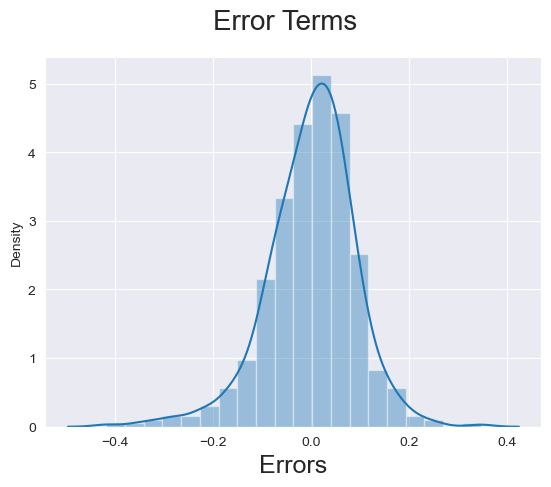

In [350]:
# Plot the histogram of the error terms
%matplotlib inline
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

## Making Predictions


#### Applying the scaling on the test sets

In [309]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

y_test = df_test.pop('cnt')
X_test = df_test

In [311]:
# Now let's use our model to make predictions.

# Creating X_test_lm dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [312]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

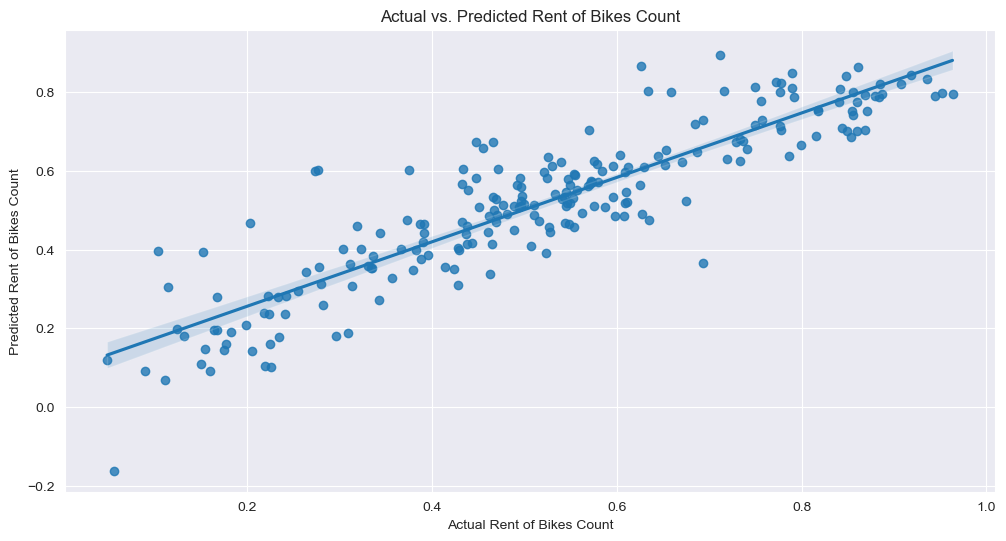

In [404]:
# Plotting y_test and y_pred to understand the spread.
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

In [406]:
## R2 score of y_test vs y_pred value
r2_score(y_test, y_pred)

0.8022983156745501

In [407]:
# cofficients of each features
Cofficients = round(lm.params,2)
coff = Cofficients.sort_values(ascending = False)
coff

temp                                             0.47
yr                                               0.23
const                                            0.21
season_winter                                    0.08
mnth_sept                                        0.08
season_summer                                    0.04
weekday_Saturday                                 0.02
mnth_jan                                        -0.04
mnth_jul                                        -0.05
season_spring                                   -0.06
weathersit_Mist_cloudy                          -0.08
holiday                                         -0.09
windspeed                                       -0.16
weathersit_Light rain_Light snow_Thunderstorm   -0.29
dtype: float64

In [408]:
# formula to calculate y value by given features
for i in range(0, len(coff)):
    print(coff[i],'*',coff.index[i],end ='')
    print(' + ',end ='')

0.47 * temp + 0.23 * yr + 0.21 * const + 0.08 * season_winter + 0.08 * mnth_sept + 0.04 * season_summer + 0.02 * weekday_Saturday + -0.04 * mnth_jan + -0.05 * mnth_jul + -0.06 * season_spring + -0.08 * weathersit_Mist_cloudy + -0.09 * holiday + -0.16 * windspeed + -0.29 * weathersit_Light rain_Light snow_Thunderstorm + 

## Conclusion

##### Temperature is the most significant feature which affect the bike business. 
##### Demand of Bike rent is more in 2019 in compare to 2018, signifies that Boom or need for this service.
##### Demand of Bike rent is high in summer and winter seasons. light rain, cloudy and spring season user dont prefer to rent a bike.
##### Demand increased in month of sept.
##### Demand decrease in holidays.

##### Train R^2 : 0.837
##### Test R^2 : 0.802